In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how = 'all', inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Visualising Data

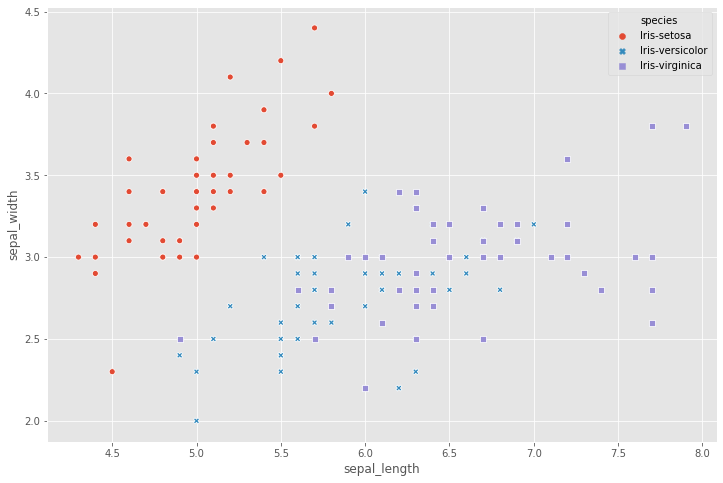

In [10]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
               hue = iris.species, style = iris.species)

## Standardise the Data

In [11]:
x = iris.iloc[:, 0:4].values
y = iris.species.values

In [13]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

## Create Eigen Vectors and Eigen Values

In [14]:
cov_matrix = np.cov(x.T)
print(cov_matrix)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [15]:
e_val, e_vec = np.linalg.eig(cov_matrix)
print(e_vec, "\n")
print(e_val)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

[2.93035378 0.92740362 0.14834223 0.02074601]


## Singular Value Decomposition (SVD)

In [16]:
e_vec_svd, s, v = np.linalg.svd(x.T)
e_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

## Picking Principal Components Using Explained Variance

In [17]:
for val in e_val:
    print(val)

2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [18]:
var_explained = [(i/sum(e_val))*100 for i in e_val]
var_explained

[72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]

In [19]:
cumulative_var = np.cumsum(var_explained)
cumulative_var

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

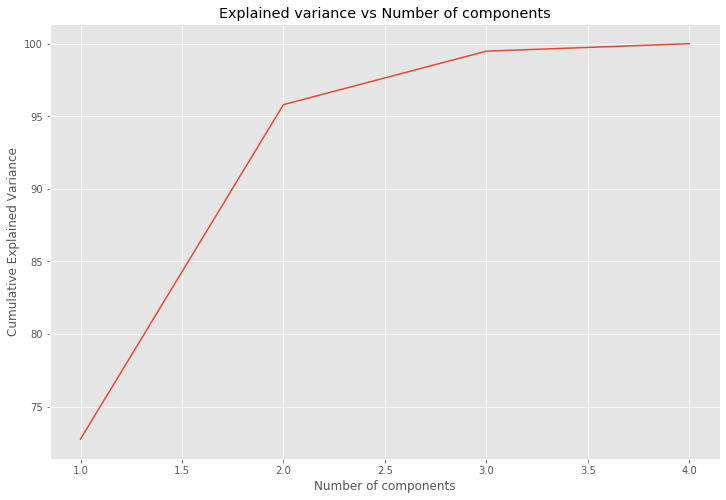

In [20]:
sns.lineplot(x = [1,2,3,4], y = cumulative_var)
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained variance vs Number of components")
plt.show()

## Project data onto lower-Dimensional Linear Subspace

In [21]:
e_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [22]:
p_matrix = (e_vec.T[:][:])[:2].T
p_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [23]:
X_pca = x.dot(p_matrix)

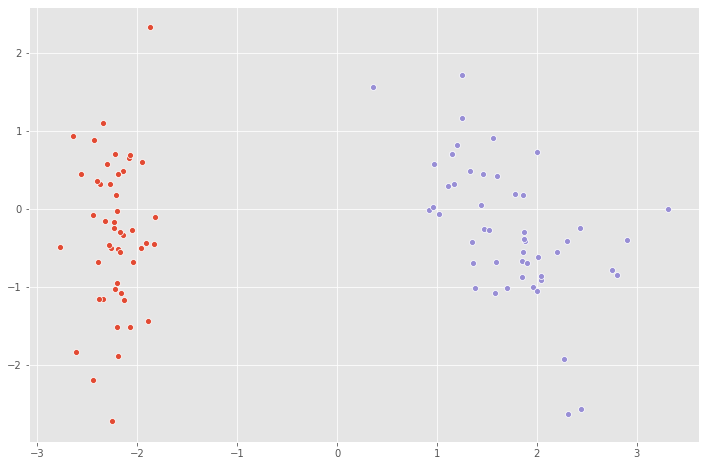

In [24]:
for species in ('Iris-setosa', 'Iris-vericolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species, 1])